In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
#height and width refer to the size of the image
#channels refers to the amoitn of color channels
image_dimensions={'height':256,'width':256,'channels':3}

In [3]:
#creat a classifier class

class Classifier:
    def __init__():
        self.model=0
    def predict(self,x):
        return self.model.predict(x)
    def fit(self,x,y):
        return self.model.train_on_batch(x,y)

    def get_accuracy(self,x,y):
        return self.model.test_on_batch(x,y)

    def load(self,path):
        self.model.load_weights(path)


In [4]:
#create a MesoNet class using the classifier

class Meso4(Classifier):
    def __init__(self,learning_rate=0.001):
        self.model=self.init_model()
        optimizer=Adam(lr=learning_rate)
        self.model.compile(optimizer=optimizer,
                          loss='mean_squared_error',
                          metrics=['accuracy'])
    #create our architecture
    def init_model(self):
        x=Input(shape=(image_dimensions['height'],image_dimensions['width'],
                      image_dimensions['channels']))
        x1=Conv2D(8,(3,3),padding='same',activation='relu')(x)
        x1=BatchNormalization()(x1)
        x1=MaxPooling2D(pool_size=(2,2),padding='same')(x1)

        x2=Conv2D(8,(5,5),padding='same',activation='relu')(x1)
        x2=BatchNormalization()(x2)
        x2=MaxPooling2D(pool_size=(2,2),padding='same')(x2)

        x3=Conv2D(16,(5,5),padding='same',activation='relu')(x2)
        x3=BatchNormalization()(x3)
        x3=MaxPooling2D(pool_size=(2,2),padding='same')(x3)

        x4=Conv2D(16,(5,5),padding='same',activation='relu')(x3)
        x4=BatchNormalization()(x4)
        x4=MaxPooling2D(pool_size=(4,4),padding='same')(x4)

        #batch normalization is to perform speed
        #normalize the inputs to each layer of the network
        #pooling layer: reduce dimensions to decrease speed of computation: max pooling is by taking the max value of the region of pixels

        y=Flatten()(x4)
        y=Dropout(0.5)(y)
        y=Dense(16)(y)
        y=LeakyReLU(alpha=0.1)(y)
        y=Dropout(0.5)(y)
        y=Dense(1,activation='sigmoid')(y)
        return Model(inputs=x,outputs=y)

In [7]:
#instantiate the mesonet model with pretrained weights
meso=Meso4()
meso.load('/content/sample_data/weights/Meso4_DF')

In [10]:
#prepare the dataset
#rescaling pixel values between 1 and 255 to a range between 0 and 1
dataGenerator=ImageDataGenerator(rescale=1./255)

#instantiating generator to feed images through the network
generator=dataGenerator.flow_from_directory('./sample_data/',
                                           target_size=(256,256),
                                           batch_size=1,
                                           class_mode='binary')

Found 20 images belonging to 3 classes.


In [11]:
#cheking class assignment
generator.class_indices

{'.ipynb_checkpoints': 0, 'DFDC': 1, 'weights': 2}

1/1 [==============================] - 1s 753ms/step
Predicted likelihood:0.6829
Actual label:1
1/1 [==============================] - 0s 86ms/step

Correct prediction:True


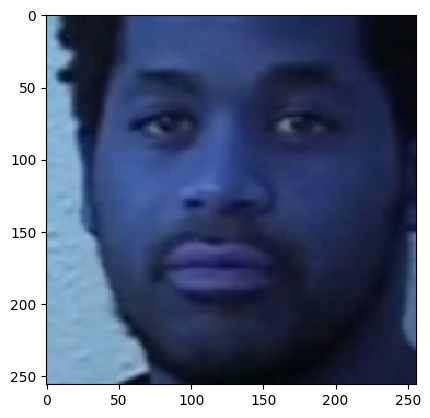

In [12]:
#Rendering image X with label y for MesoNet
X,y=generator.next()
#Evaluating prediction
print(f"Predicted likelihood:{meso.predict(X)[0][0]:.4f}")
print(f"Actual label:{int(y[0])}")
print(f"\nCorrect prediction:{round(meso.predict(X)[0][0])==y[0]}")

#showing image
#our data has currentlu an extra dimension for its position in the batch and this needs to be removed before imshow so that it can properly render the image
#this is why we use the numpy function squeeze
plt.imshow(np.squeeze(X))

In [13]:
#creating separate lists for correctly classified and misclassified images
correct_real=[]
correct_real_pred=[]

correct_deepfake=[]
correct_deepfake_pred=[]

misclassified_real=[]
misclassified_real_pred=[]

misclassified_deepfake=[]
misclassified_deepfake_pred=[]

In [14]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):

    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]

    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 42ms/step
0  predictions completed.
1/1 [==============================] - 0s 70ms/step
All 20 predictions completed


In [15]:
def plotter(images,preds):
    fig=plt.figure(figsize=(16,9))
    subset=np.random.randint(0,len(images)-1,12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax=plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show
    return

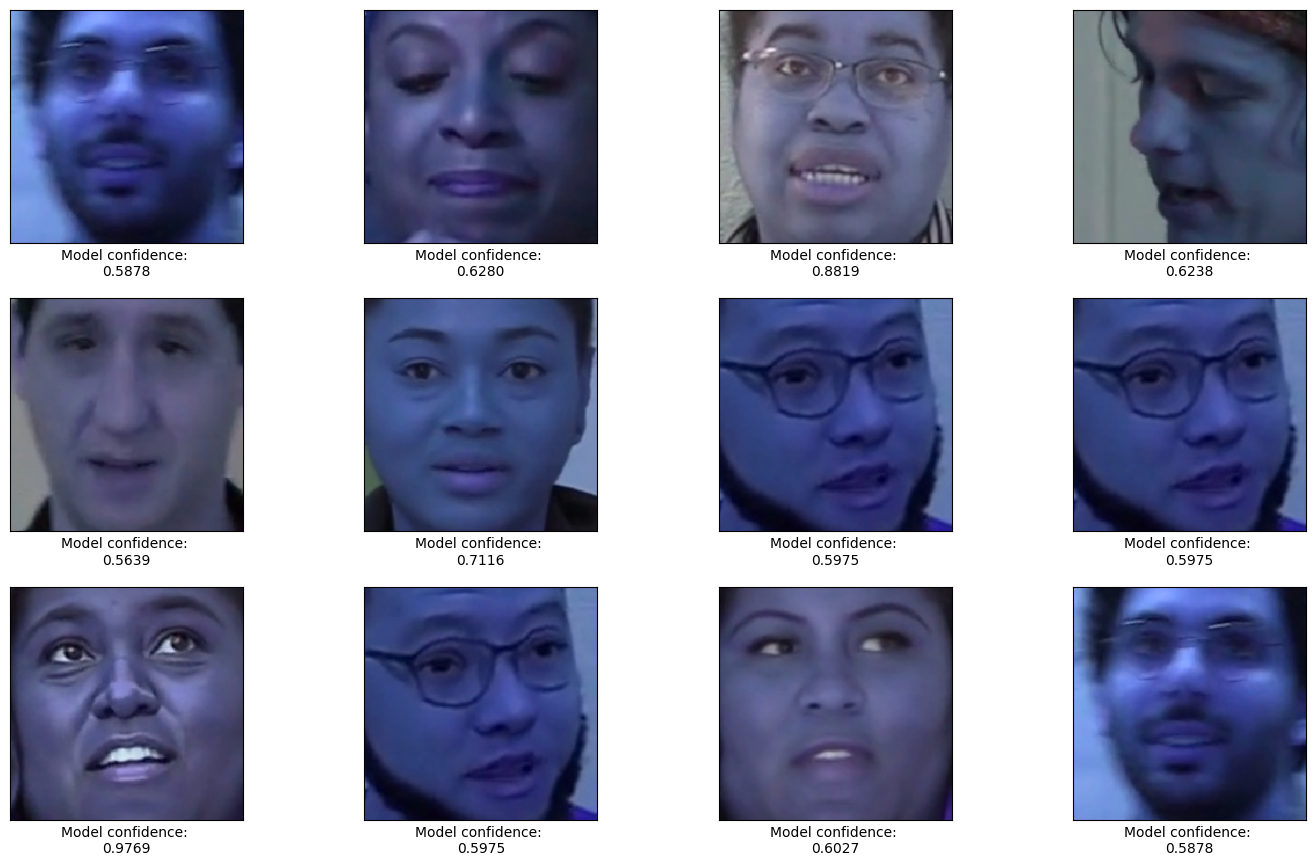

In [16]:
plotter(correct_real,correct_real_pred)

In [18]:
!pip install numpy
import numpy as np

np.random.randint?

In [19]:
print(len(misclassified_real))

1


In [21]:
print(f"Length of misclassified_real: {len(misclassified_real)}")

Length of misclassified_real: 1


In [22]:
print(f"Length of misclassified_real_pred: {len(misclassified_real_pred)}")

Length of misclassified_real_pred: 1


In [23]:
num_images = len(misclassified_real)
subset = np.random.randint(0, num_images, 12)

In [25]:
# Print the type of subset
print(type(subset))

<class 'numpy.ndarray'>


In [26]:
# Print the shape of subset
print(subset.shape)

(12,)


In [27]:
# Print the first element of subset
print(subset[0])

0


In [28]:
# Print the type of subset[0]
print(type(subset[0]))

<class 'numpy.int64'>


In [31]:
print(subset)

[0 0 0 0 0 0 0 0 0 0 0 0]


In [32]:
subset = subset.astype(int)

In [35]:
print(len(misclassified_real))

1


In [39]:
# If `subset` is not an integer scalar, convert it to one:
if not isinstance(subset, int):
    subset = np.random.randint(0,len(images)-1,12)

In [41]:
images = []
if len(images) > 0:
    subset=np.random.randint(0,len(images)-1,12)
else:
    subset = []

In [43]:
print(len(images))

0


In [44]:
def plotter(images, preds):
    if len(images) <= 0:
        raise ValueError("The 'images' list is empty.")

    fig = plt.figure(figsize=(16, 9))
    subset = np.random.randint(0, len(images) - 1, 12)
    for i, j in enumerate(subset):
        fig.add_subplot(3, 4, i + 1)

In [46]:
def plotter(images, preds):
    fig = plt.figure(figsize=(16, 9))
    subset = np.random.randint(0, len(images), 12)
    for i, j in enumerate(subset):
        fig.add_subplot(3, 4, i + 1)
        plt.imshow(images[j])
        plt.title(preds[j])
        plt.axis('off')

In [49]:
import numpy as np
misclassified_real = np.array(misclassified_real)

In [54]:
print(misclassified_real.shape)
print(misclassified_real.size)

(1, 1, 256, 256, 3)
196608


In [55]:
total_elements = 1
for dim in misclassified_real.shape:
    total_elements *= dim
print(total_elements)

196608


In [57]:
new_shape = np.array(new_shape)
new_shape[0] = int(total_elements / (28 * 28))

In [58]:
new_shape = tuple(new_shape)

In [59]:
print(new_shape)

(250, 28, 28)


In [61]:
print(misclassified_real.shape)

(1, 1, 256, 256, 3)


In [63]:
flattened_array = misclassified_real.reshape(-1)

In [64]:
num_rows = int(np.sqrt(total_elements))

In [66]:
expected_elements = 28 * 28

In [72]:
flattened_array_size = flattened_array.size
desired_shape_size = 7 * 7

In [76]:
shape = np.shape(flattened_array)
print(shape)

(196608,)


In [77]:
total_elements = np.prod(shape)
print(total_elements)

196608


In [78]:
is_divisible = (total_elements % 49 == 0)

In [79]:
if not is_divisible:
    raise ValueError("Cannot reshape array of size {} into shape (7,7)".format(total_elements))

ValueError: Cannot reshape array of size 196608 into shape (7,7)

TypeError: Invalid shape (1, 256, 256, 3) for image data

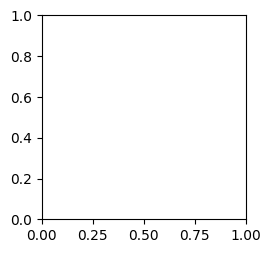

In [80]:
plotter(misclassified_real,misclassified_real_pred)

In [81]:
#correctly identified deepfakes
plotter(correct_deepfake,correct_deepfake_pred)

ValueError: high <= 0

<Figure size 1600x900 with 0 Axes>

In [82]:
plotter(misclassified_deepfake,misclassified_deepfake_pred)

ValueError: high <= 0

<Figure size 1600x900 with 0 Axes>

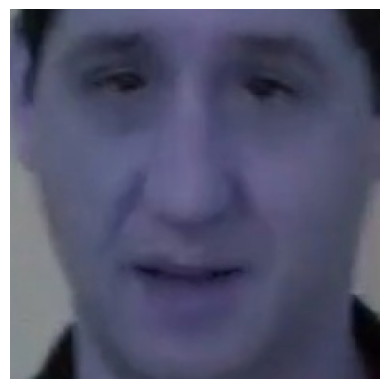

In [85]:
#let's show an image which is fake
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "/content/sample_data/DFDC/Fake/aabdogagch_150.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [86]:
#let's use mesonet to predict on this image
image.shape

(224, 224, 3)

In [89]:
from PIL import Image

# Open the image
image = Image.open("/content/sample_data/DFDC/Fake/aabdogagch_150.jpg")

# Resize the image
image = image.resize((256, 256))

# Specify the file extension when saving the image
resized_image_path = "/content/sample_data/DFDC/Fake/aabdogagch_150_resized_image.jpg"

# Save the image
image.save(resized_image_path)

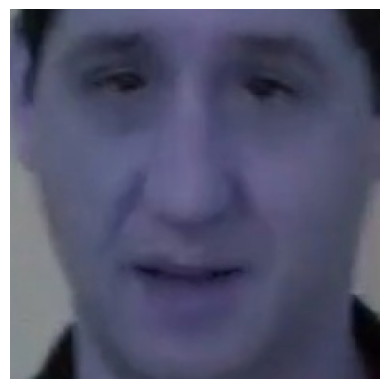

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "/content/sample_data/DFDC/Fake/aabdogagch_150.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [91]:
image.shape

(224, 224, 3)

In [94]:
!pip install tensorflow
import tensorflow as tf

In [96]:
print(f"Image shape: {image.shape}")

Image shape: (224, 224, 3)


In [97]:
model_input_shape = meso.model.input_shape
print(f"Expected model input shape: {model_input_shape}")

Expected model input shape: (None, 256, 256, 3)


In [98]:
if image.shape != model_input_shape:
    print("Image shape does not match the expected model input shape.")

Image shape does not match the expected model input shape.


In [100]:
if image.shape != model_input_shape:
    resized_image = tf.image.resize(image, model_input_shape)

ValueError: 'size' must be a 1-D int32 Tensor

In [101]:
pred = meso.predict(resized_image)[0][0]

InvalidArgumentError: Graph execution error:

Detected at node model_2/conv2d_8/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-95-ed9c088c5741>", line 8, in <cell line: 8>

  File "<ipython-input-3-8c3150e6cef3>", line 7, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

convolution input must be 4-dimensional: [32,256,3]
	 [[{{node model_2/conv2d_8/Relu}}]] [Op:__inference_predict_function_2897]

In [105]:
dataGenerator=ImageDataGenerator(rescale=1./255)

#instantiating generator to feed images through the network
generator=dataGenerator.flow_from_directory("/content/sample_data/DFDC",
                                           target_size=(256,256),
                                           batch_size=1,
                                           class_mode='binary')

Found 21 images belonging to 3 classes.


In [106]:
generator.class_indices

{'.ipynb_checkpoints': 0, 'Fake': 1, 'Real': 2}

In [107]:
im,y=generator.next()
print(f"Predicted likelihood:{meso.predict(im)[0][0]:.4f}")

1/1 [==============================] - 0s 47ms/step
Predicted likelihood:0.5363


1/1 [==============================] - 0s 38ms/step
Predicted likelihood:0.5363
Actual label:2
1/1 [==============================] - 0s 37ms/step

Correct prediction:False


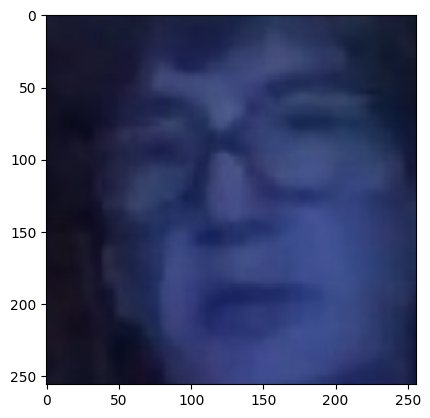

In [108]:
print(f"Predicted likelihood:{meso.predict(im)[0][0]:.4f}")
print(f"Actual label:{int(y[0])}")
print(f"\nCorrect prediction:{round(meso.predict(im)[0][0])==y[0]}")

#showing image
#our data has currentlu an extra dimension for its position in the batch and this needs to be removed before imshow so that it can properly render the image
#this is why we use the numpy function squeeze
plt.imshow(np.squeeze(im))

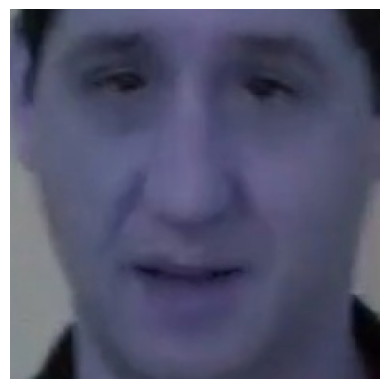

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "/content/sample_data/DFDC/Fake/aabdogagch_150.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [113]:
dataGenerator=ImageDataGenerator(rescale=1./255)

#instantiating generator to feed images through the network
generator=dataGenerator.flow_from_directory("/content/sample_data/DFDC/Fake",
                                           target_size=(256,256),
                                           batch_size=1,
                                           class_mode='binary')

Found 0 images belonging to 1 classes.


In [114]:
generator.class_indices

{'.ipynb_checkpoints': 0}

In [116]:
if im.size == 0:
    print("Error: Input data is empty.")
else:
    # Continue with the code
    print(f"Predicted likelihood:{meso.predict(im)[0][0]:.4f}")

Error: Input data is empty.


In [118]:
dataGenerator=ImageDataGenerator(rescale=1./255)

#instantiating generator to feed images through the network
generator=dataGenerator.flow_from_directory("/content/sample_data/DFDC/Fake",
                                           target_size=(256,256),
                                           batch_size=1,
                                           class_mode='binary')

Found 0 images belonging to 1 classes.


In [121]:
print(f"Shape of im: {im.shape}")

Shape of im: (0, 256, 256, 3)


In [122]:
print(f"Model trained: {meso.model.trained_weights_only}")

AttributeError: 'Functional' object has no attribute 'trained_weights_only'